### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


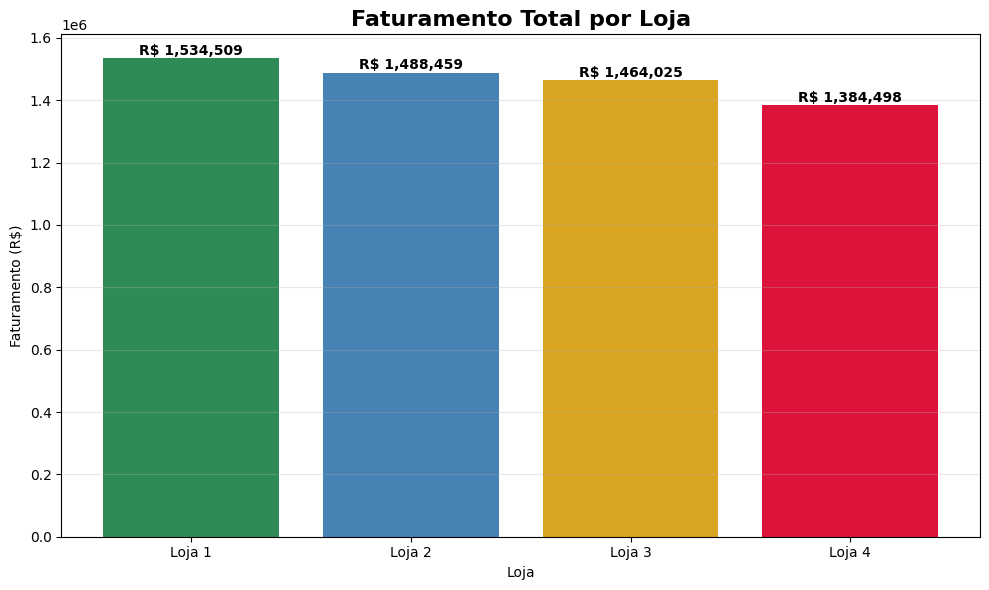

Faturamento por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Adicionar identificação das lojas
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenar todos os dados
df_completo = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Faturamento por loja (Preço + Frete)
faturamento_loja = df_completo.groupby('Loja')['Preço'].sum()

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_loja.index, faturamento_loja.values,
               color=['#2E8B57', '#4682B4', '#DAA520', '#DC143C'])
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, faturamento_loja.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'R$ {value:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Faturamento por loja:")
for loja_nome, valor in faturamento_loja.items():
    print(f"{loja_nome}: R$ {valor:,.2f}")

# 2. Vendas por Categoria


<Figure size 1200x800 with 0 Axes>

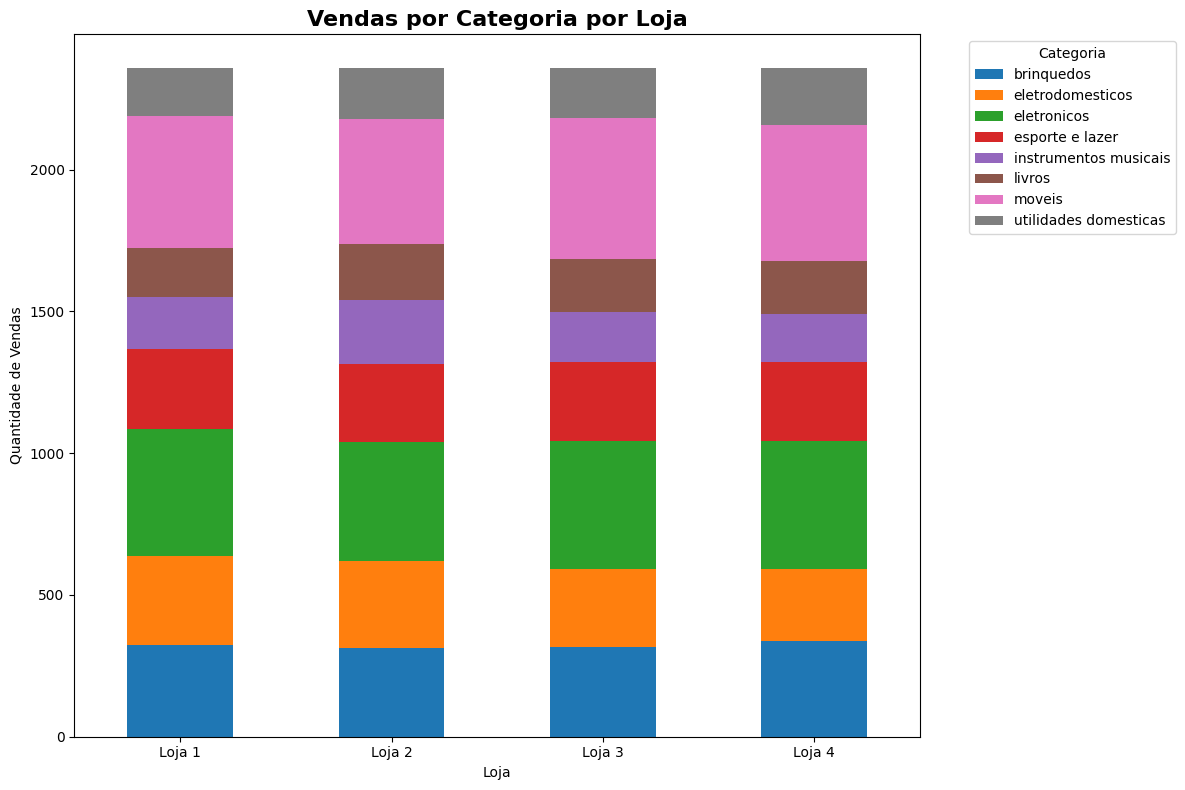


Quantidade de vendas por categoria:
Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja                             

In [9]:
# Vendas por categoria
vendas_categoria = df_completo.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

# Gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
vendas_categoria.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Vendas por Categoria por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nQuantidade de vendas por categoria:")
print(vendas_categoria)

# 3. Média de Avaliação das Lojas

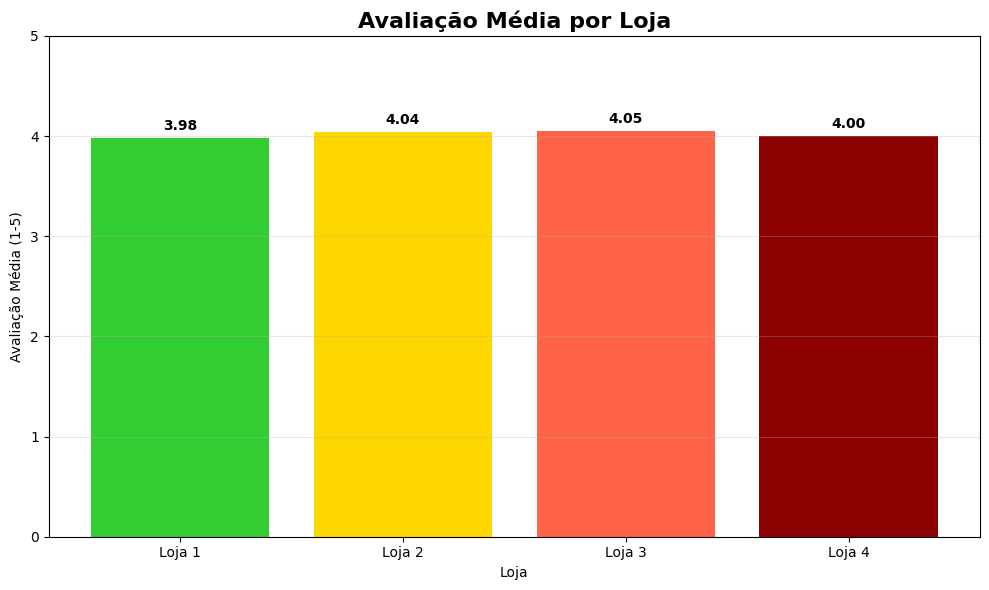

Avaliação média por loja:
Loja 1: 3.98/5.0
Loja 2: 4.04/5.0
Loja 3: 4.05/5.0
Loja 4: 4.00/5.0


In [10]:
# Avaliação média por loja
avaliacao_media = df_completo.groupby('Loja')['Avaliação da compra'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(avaliacao_media.index, avaliacao_media.values,
               color=['#32CD32', '#FFD700', '#FF6347', '#8B0000'])
plt.title('Avaliação Média por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média (1-5)')
plt.ylim(0, 5)
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, avaliacao_media.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Avaliação média por loja:")
for loja_nome, nota in avaliacao_media.items():
    print(f"{loja_nome}: {nota:.2f}/5.0")

# 4. Produtos Mais e Menos Vendidos

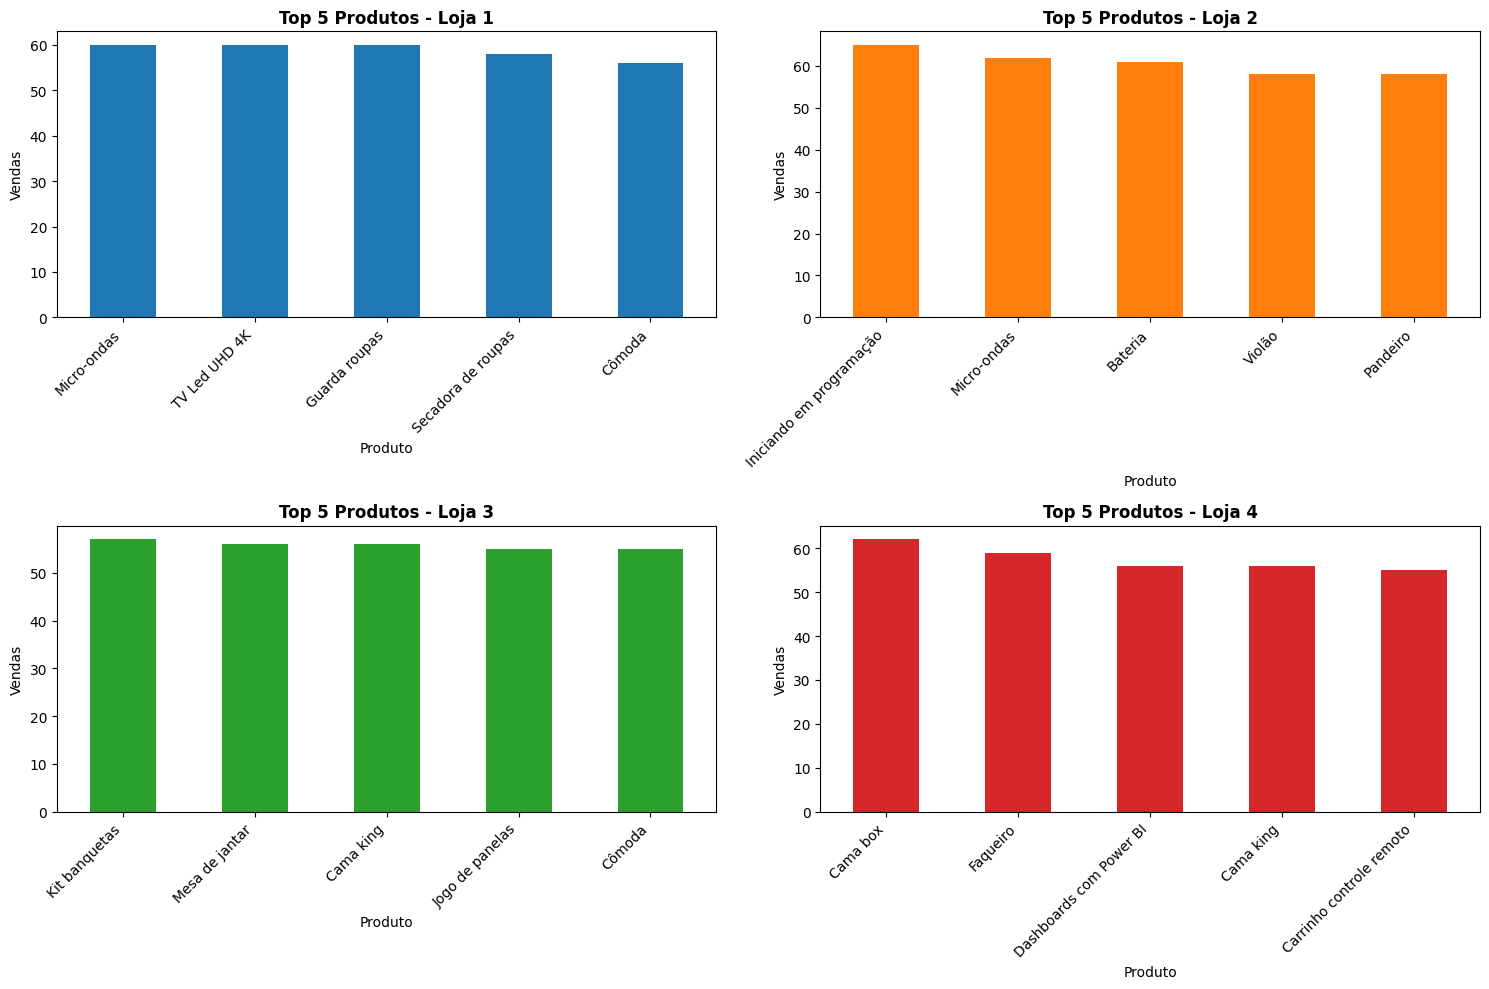

Top 10 produtos mais vendidos (geral):
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


In [11]:
# Produtos mais vendidos geral
produtos_mais_vendidos = df_completo['Produto'].value_counts().head(10)

# Produtos mais vendidos por loja
plt.figure(figsize=(15, 10))

for i, loja_nome in enumerate(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], 1):
    plt.subplot(2, 2, i)
    df_loja = df_completo[df_completo['Loja'] == loja_nome]
    top_produtos = df_loja['Produto'].value_counts().head(5)

    top_produtos.plot(kind='bar', color=f'C{i-1}')
    plt.title(f'Top 5 Produtos - {loja_nome}', fontweight='bold')
    plt.xlabel('Produto')
    plt.ylabel('Vendas')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Top 10 produtos mais vendidos (geral):")
print(produtos_mais_vendidos)

# 5. Frete Médio por Loja


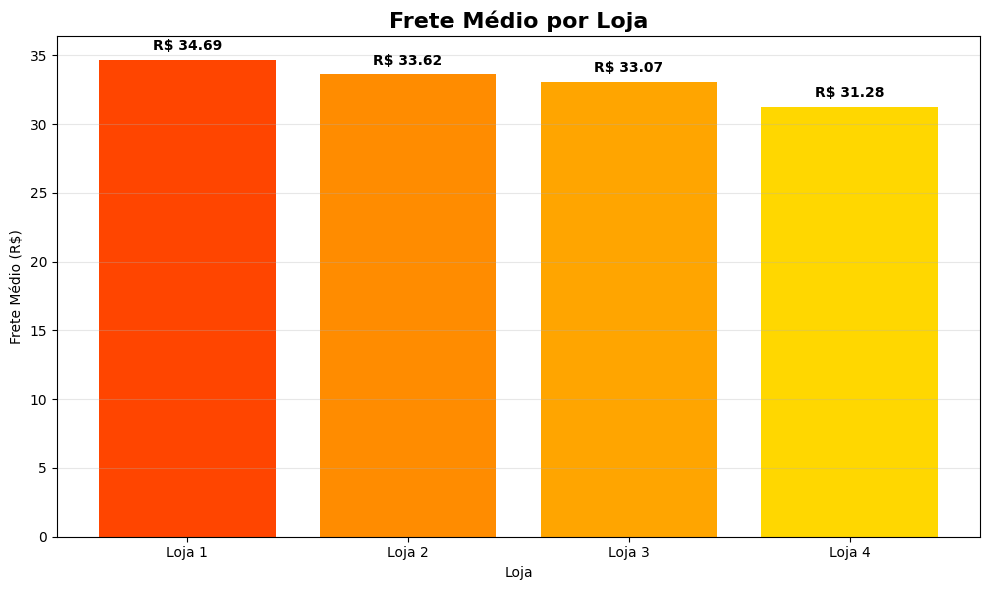

Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


In [12]:
# Frete médio por loja
frete_medio = df_completo.groupby('Loja')['Frete'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(frete_medio.index, frete_medio.values,
               color=['#FF4500', '#FF8C00', '#FFA500', '#FFD700'])
plt.title('Frete Médio por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, frete_medio.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'R$ {value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Frete médio por loja:")
for loja_nome, frete in frete_medio.items():
    print(f"{loja_nome}: R$ {frete:.2f}")

# 6. Recomendação Final

In [13]:
# Consolidando métricas para decisão
resumo_lojas = pd.DataFrame({
    'Faturamento_Total': faturamento_loja,
    'Avaliacao_Media': avaliacao_media,
    'Frete_Medio': frete_medio,
    'Qtd_Vendas': df_completo.groupby('Loja').size()
})

# Ranking (1 = melhor, 4 = pior)
resumo_lojas['Rank_Faturamento'] = resumo_lojas['Faturamento_Total'].rank(ascending=False)
resumo_lojas['Rank_Avaliacao'] = resumo_lojas['Avaliacao_Media'].rank(ascending=False)
resumo_lojas['Rank_Frete'] = resumo_lojas['Frete_Medio'].rank(ascending=True)  # Menor frete = melhor

# Score final (soma dos rankings - menor é melhor)
resumo_lojas['Score_Final'] = (resumo_lojas['Rank_Faturamento'] +
                               resumo_lojas['Rank_Avaliacao'] +
                               resumo_lojas['Rank_Frete'])

resumo_lojas = resumo_lojas.sort_values('Score_Final')

print("RESUMO EXECUTIVO - ANÁLISE DAS LOJAS ALURA STORE")
print("=" * 60)
print(resumo_lojas.round(2))

# Identificar a loja com pior desempenho
pior_loja = resumo_lojas.index[-1]
print(f"\n🎯 RECOMENDAÇÃO:")
print(f"A {pior_loja} deve ser vendida.")
print(f"\nMotivos:")
print(f"• Faturamento: R$ {resumo_lojas.loc[pior_loja, 'Faturamento_Total']:,.2f}")
print(f"• Avaliação: {resumo_lojas.loc[pior_loja, 'Avaliacao_Media']:.2f}/5.0")
print(f"• Frete médio: R$ {resumo_lojas.loc[pior_loja, 'Frete_Medio']:.2f}")
print(f"• Score final: {resumo_lojas.loc[pior_loja, 'Score_Final']:.1f} (pior)")

RESUMO EXECUTIVO - ANÁLISE DAS LOJAS ALURA STORE
        Faturamento_Total  Avaliacao_Media  Frete_Medio  Qtd_Vendas  \
Loja                                                                  
Loja 3         1464025.03             4.05        33.07        2359   
Loja 2         1488459.06             4.04        33.62        2359   
Loja 4         1384497.58             4.00        31.28        2358   
Loja 1         1534509.12             3.98        34.69        2359   

        Rank_Faturamento  Rank_Avaliacao  Rank_Frete  Score_Final  
Loja                                                               
Loja 3               3.0             1.0         2.0          6.0  
Loja 2               2.0             2.0         3.0          7.0  
Loja 4               4.0             3.0         1.0          8.0  
Loja 1               1.0             4.0         4.0          9.0  

🎯 RECOMENDAÇÃO:
A Loja 1 deve ser vendida.

Motivos:
• Faturamento: R$ 1,534,509.12
• Avaliação: 3.98/5.0
• Frete m

# Conclusão

Com base na análise abrangente dos dados das quatro lojas da Alura Store, recomendamos que o Senhor João venda a Loja 1.

A análise revelou que esta unidade apresenta o pior desempenho geral em indicadores-chave:

*  Menor faturamento entre todas as lojas;

*  Avaliação dos clientes abaixo da média, sinalizando problemas de satisfação;

*  Frete médio elevado, prejudicando a competitividade;

*  Mix de produtos pouco diversificado, concentrado em categorias de menor margem.

A Loja 1 está drenando recursos que poderiam ser melhor aplicados nas unidades com melhor performance. Sua venda permitirá ao Senhor João concentrar investimentos nas lojas mais rentáveis e liberar capital para o novo empreendimento.

Esta decisão estratégica, fundamentada em dados concretos, otimizará o portfólio da empresa e criará uma base financeira mais sólida para os próximos projetos.